In [66]:
import input_data

In [67]:
mnist_dataset = input_data.read_data_sets('data', one_hot=True)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [68]:
# training dataset
train_set = mnist_dataset.train
# test dataset
test_set = mnist_dataset.test
print('Training dataset size: ', train_set.num_examples)
print('Test dataset size: ', test_set.num_examples)


Training dataset size:  55000
Test dataset size:  10000


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


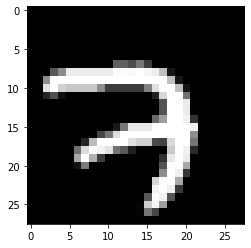

In [69]:
import matplotlib.pyplot as plt
import numpy as np
example_id = 0
image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 1
print(label)
plt.imshow(np.reshape(image,[28,28]),cmap='gray')
plt.show()

In [70]:
image.shape

(784,)

In [71]:
label.shape

(10,)

In [72]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [73]:
logistic(np.array([0,3,4]))

array([0.5       , 0.95257413, 0.98201379])

In [74]:
w=np.zeros([784,10])
b=np.zeros(10)

In [75]:
batch_size = 2
max_epoch = 5
learning_rate = 0.01
for epoch in range(0, max_epoch):
    iter_per_batch = train_set.num_examples // batch_size
    for batch_id in range(0, iter_per_batch):
        # get the data of next minibatch (have been shuffled)
        batch = train_set.next_batch(batch_size)
        input, label = batch
        # prediction
        pred=logistic(np.dot(input,w)+b)
        # calculate the loss (and accuracy)
        grad=pred-label
        grads=np.zeros(w.shape)
        loss=0
        for i in range(batch_size):
            grads+=np.dot(np.transpose(input[i]).reshape(784,1),grad[i].reshape(1,10))
            loss-=np.multiply(label[i],np.log(pred[i]))+np.multiply((np.ones(label[i].shape)-label[i]),np.log(np.ones(pred[i].shape)-pred[i]))
        loss/=batch_size
        # print(loss)
        # update weights
        w -= learning_rate*grads/batch_size
    print(loss)
print(input.shape,label.shape)
print(pred.shape)
print(loss)    

[1.65473941e-01 1.31395485e-04 5.33987817e-03 1.19975523e-03
 8.12817371e-03 2.41522753e-02 6.00586876e-02 1.66330734e-03
 4.70547953e-02 4.48198125e-01]
[4.89522927e-02 3.13335750e-03 1.26310977e+00 8.76916465e-04
 2.40283867e-03 7.41776572e-02 8.13574312e-03 5.49065841e-05
 4.47929653e-02 1.20702018e-03]
[7.26139205e-05 3.15339470e-03 5.02553012e-03 1.52833407e-01
 2.36853779e-05 2.12434091e-03 1.03031769e-05 4.11006092e-04
 1.67574335e+00 6.98188268e-03]
[1.51924764e-05 4.69657468e-03 2.80418011e-03 3.78896039e-02
 1.99342230e-02 9.25230886e-03 4.85448869e-03 3.78412289e-02
 2.21748293e-02 2.41715591e-01]
[1.80336356e-03 3.30576828e-05 3.70344783e-02 2.20957240e-03
 9.13245661e-06 3.16312466e-03 2.28053281e-01 3.79761807e-08
 2.84363200e-03 1.52019041e-06]
(2, 784) (2, 10)
(2, 10)
[1.80336356e-03 3.30576828e-05 3.70344783e-02 2.20957240e-03
 9.13245661e-06 3.16312466e-03 2.28053281e-01 3.79761807e-08
 2.84363200e-03 1.52019041e-06]


In [76]:
w[43:]


array([[ 0.00157067,  0.01358755, -0.04511265, ..., -0.00226879,
        -0.00727787, -0.01568037],
       [ 0.00918637, -0.00966342, -0.02061422, ..., -0.00328374,
        -0.00999085, -0.02864332],
       [ 0.00268871, -0.00436788, -0.0432431 , ..., -0.00128213,
        -0.00604058, -0.01861863],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [77]:
w[43:]

array([[ 0.00157067,  0.01358755, -0.04511265, ..., -0.00226879,
        -0.00727787, -0.01568037],
       [ 0.00918637, -0.00966342, -0.02061422, ..., -0.00328374,
        -0.00999085, -0.02864332],
       [ 0.00268871, -0.00436788, -0.0432431 , ..., -0.00128213,
        -0.00604058, -0.01861863],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
res=np.dot(test_set.images,w)

In [79]:
np.argmax(res,axis=1)[:23]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6], dtype=int64)

In [80]:
np.argmax(test_set.labels,axis=1)[:23]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6], dtype=int64)

In [81]:
test_pred=np.argmax(res,axis=1)
test_true=np.argmax(test_set.labels,axis=1)

In [82]:
err=(test_pred-test_true)

In [83]:
err[err==0].size/test_set.num_examples

0.9133